In [1]:
format compact
%plot inline

In [2]:
Data_directory = fullfile(fileparts(fileparts(cd)),"Data\aggregated");

In [3]:
Patients = readtable(append(Data_directory,"\Patients.csv"));
Num_patients = size(Patients,1);

Patients(1,:)

ans =
  1x3 table
    Patient_id            Patient_Name             Target 
    __________    ____________________________    ________
        1         {'AMIRMAHDI SAFARI-9- TASK'}    {'ADHD'}



In [4]:
Channels = arrayfun(@(z) join(["Channel",z],"_") , 1:19);

In [5]:
EEG = readtable(append(Data_directory,"\EEG.csv"));
size(EEG)

EEG (1,:)

ans =
     3453468          21
ans =
  1x21 table
    Channel_1    Channel_2    Channel_3    Channel_4    Channel_5    Channel_6    Channel_7    Channel_8    Channel_9    Channel_10    Channel_11    Channel_12    Channel_13    Channel_14    Channel_15    Channel_16    Channel_17    Channel_18    Channel_19    patient_id    Sample
    _________    _________    _________    _________    _________    _________    _________    _________    _________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    __________    ______
      -0.71        -1.22       -10.77        -5.91        -8.91        -4.24        -3.18         2.4         -1.9         -3.12         -4.89         -6.54         -6.67          -4.2         -3.14         -3.83         -3.76         -3.26         -0.18           1           1   



# Average correlation between channels in all patients

In [6]:
CORRELATION = [];
for i = 1:Num_patients
    u = EEG(EEG.patient_id==i,:);
    
    CORRELATION(:,:,i) = corr(table2array(u(:,1:end-2)));
end

    19    19    71



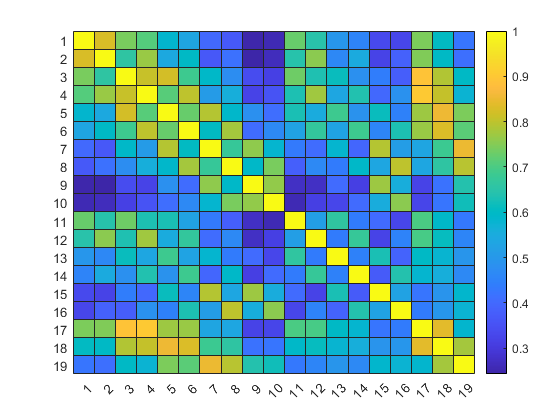

In [7]:
disp(size(CORRELATION))
heatmap(mean(CORRELATION,3))
colormap('parula')

# compare channels between patients & non-patients

separate EEG data of patients & nonpatients

In [8]:
adhd_patient_ids = Patients(Patients.Target == "ADHD",'Patient_id');
adhd_patient_ids = table2array(adhd_patient_ids);

adhd_patient_ids(1)

ans =
     1



In [9]:
non_adhd_patient_ids = setdiff(1:Num_patients,adhd_patient_ids);

In [10]:
rows = ismember(EEG.patient_id ,adhd_patient_ids);
EEG_patients = EEG(rows,:);
EEG_non_patients = EEG(~rows,:);

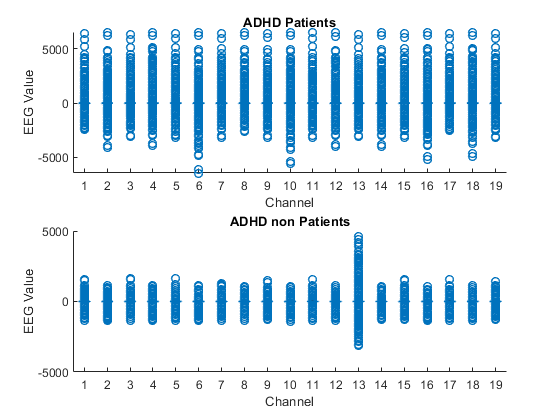

In [11]:
subplot(2,1,1)

boxchart(table2array (EEG_patients(:,1:end-2) ));
xlabel('Channel')
ylabel('EEG Value')
title("ADHD Patients")

subplot(2,1,2)
boxchart(table2array (EEG_non_patients(:,1:end-2) ));
xlabel('Channel')
ylabel('EEG Value')
title("ADHD non Patients")

In [12]:
channel = "Channel_2";
a= adhd_patient_ids(1);
u=EEG(EEG.patient_id==a,channel);


b= non_adhd_patient_ids(1);
v=EEG(EEG.patient_id==b,channel);

Range of data for patients & non-patients are different !

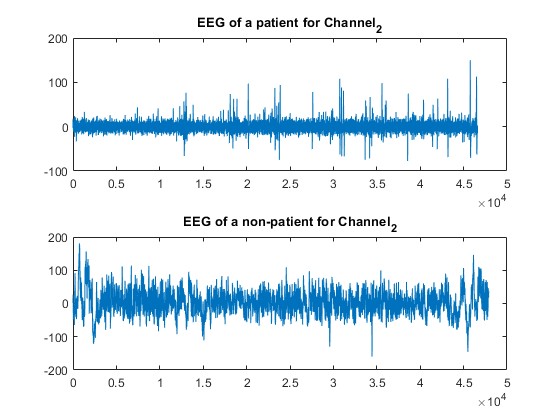

In [13]:
subplot(2,1,1)
plot(u{:,channel})
title(sprintf('EEG of a patient for %s',channel))

subplot(2,1,2)
plot(v{:,channel})
title(sprintf('EEG of a non-patient for %s',channel))